In [2]:
from pathlib import Path
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
from time import time
from munch import Munch
import pickle

%matplotlib inline

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

columnwidth = 246/72.27

plt.rc('font', family='sans-serif')
plt.rc('figure', dpi=200) #makes the plots display larger in the jupyter view
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('figure', autolayout=False)

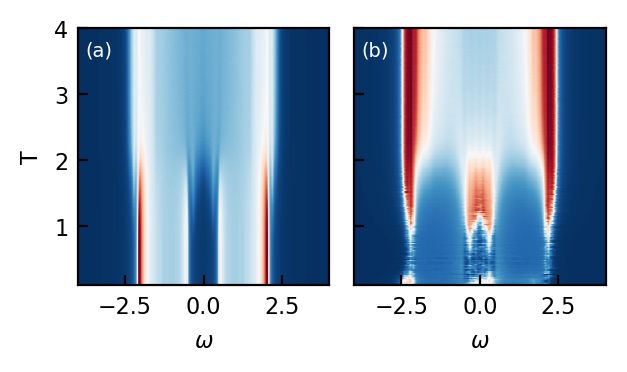

In [3]:
from FKMC.general import smooth

width = columnwidth
height =  columnwidth / 2
dpi = 150

f, axes = plt.subplots(1,2, sharey = 'all', gridspec_kw = dict(wspace = 0.1))

with open('/data/users/tch14/pickled_data/Long_range_IPR_and_DOS.pickle', 'rb') as file: LR_data = pickle.load(file)

#plot the E-T DOS Diagram

ax = axes[0]
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
I = smooth(LR_data.I, scale = 0.7, axis = -1)
E = smooth(LR_data.E_hist, scale = 0.7, axis = -1)

pcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, E, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = 'T', xlabel = '$\omega$', ylim = (0.1,4), xlim = (-4, 4))

    
#plot the E-T IPR diagram Diagram
ax = axes[1]
pcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, I, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(xlabel = '$\omega$', xlim = (-4, 4))

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)"], axes):
    ax.text(0.03, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'white')

#f.subplots_adjust(bottom=0.2)
f.set_size_inches(width,height)
f.savefig('/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs/band_opening.eps', bbox_inches='tight')

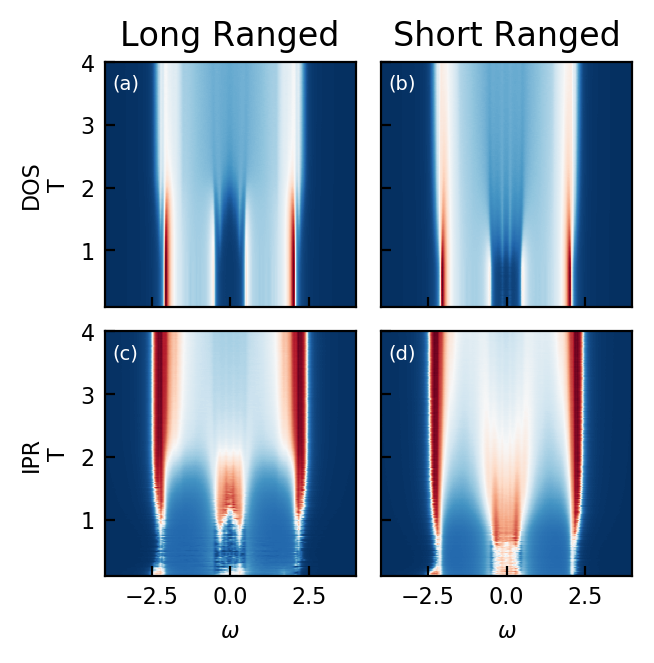

In [4]:
from FKMC.general import smooth

width = columnwidth
height =  columnwidth
dpi = 150

f, axes = plt.subplots(2,2, sharey = 'all', sharex = 'all', gridspec_kw = dict(wspace = 0.1, hspace = 0.1))

with open('/data/users/tch14/pickled_data/Long_range_IPR_and_DOS.pickle', 'rb') as file: LR_data = pickle.load(file)
with open('/data/users/tch14/pickled_data/Short_range_IPR_and_DOS.pickle', 'rb') as file: SR_data = pickle.load(file)

#plot the E-T DOS Diagram

ax = axes[0,0]
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
I = smooth(LR_data.I, scale = 0.7, axis = -1)
E = smooth(LR_data.E_hist, scale = 0.7, axis = -1)

pcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, E, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = 'DOS\nT', xlabel = '', ylim = (0.1,4), xlim = (-4, 4), title = 'Long Ranged')

    
#plot the E-T IPR diagram Diagram
ax = axes[1,0]
pcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, I, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = 'IPR\nT', xlabel = '$\omega$', xlim = (-4, 4))

ax = axes[0,1]
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
I = smooth(SR_data.I, scale = 0.7, axis = -1)
E = smooth(SR_data.E_hist, scale = 0.7, axis = -1)

pcol = ax.pcolormesh(SR_data.E_bins, SR_data.Ts, E, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = '', xlabel = '', ylim = (0.1,4), xlim = (-4, 4), title = 'Short Ranged')

    
#plot the E-T IPR diagram Diagram
ax = axes[1,1]
pcol = ax.pcolormesh(SR_data.E_bins, SR_data.Ts, I, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(xlabel = '$\omega$', xlim = (-4, 4))

for a in axes.flatten(): a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)","(d)"], axes.flatten()):
    ax.text(0.03, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'white')

#f.subplots_adjust(bottom=0.2)
f.set_size_inches(width,height)
f.savefig('/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs/band_opening_2.eps', bbox_inches='tight')

In [4]:
def log_params(data):
    print(f'Keys: {", ".join(data.keys())}')
    p = data.parameters
    m = data.MCMC_params
    print('Simulation Parameters')
    print(', '.join(f'{k} : {v}' for k,v in p.items() if k != 'J_matrix'))
    print('MCMC Parameters')
    print(', '.join(f'{k} : {v}' for k,v in m.items()))

TJ_data:
Keys: Mf_moments, sigma_Mf_moments, E_bins, IPR, DOS, total_jobs, Js, Ts, Ns, repeats, structure_names, parameters, MCMC_params, desc, structure_dims, hints, T
Simulation Parameters
N_sites : 128, t : 1, alpha : 1.25, mu : 0, beta : 10.0, J : 0.0, U : 1, normalise : True
MCMC Parameters
state : None, N_steps : 100000, N_burn_in : 10000, thin : 100, logger : <FKMC.montecarlo.Eigenspectrum_IPR_all object at 0x7f317a93ccf8>, proposal : <function p_multi_site_uniform_reflect at 0x7f317b4ae598>, accept_function : <function perturbation_accept at 0x7f317b4ae8c8>, warnings : True
TU_data:
Keys: Mf_moments, sigma_Mf_moments, E_bins, IPR, DOS, total_jobs, Us, Ts, Ns, repeats, structure_names, parameters, MCMC_params, desc, structure_dims, hints, T
Simulation Parameters
N_sites : 128, t : 1, alpha : 1.5, mu : 0, beta : 10.0, J : 5, U : 0.0, normalise : True
MCMC Parameters
state : None, N_steps : 100000, N_burn_in : 10000, thin : 100, logger : <FKMC.montecarlo.Eigenspectrum_IPR_all obje

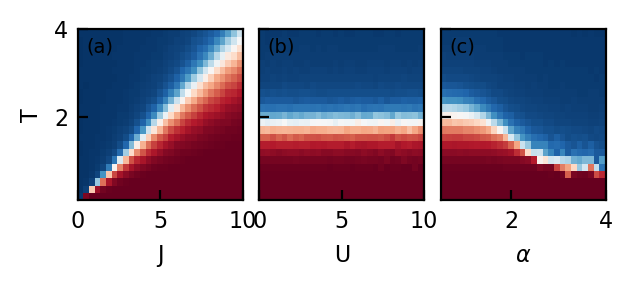

In [15]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

width = columnwidth
height =  columnwidth / 3
dpi = 150

binder = False

f, axes = plt.subplots(1,3, sharey = 'all', gridspec_kw = dict(wspace = 0.1))

def TJ_phase_diagram(ax):
    with open('/data/users/tch14/pickled_data/TJ_phase_data.pickle', 'rb') as file: 
        TJ_data = pickle.load(file)   
    
    print('TJ_data:')
    log_params(TJ_data)
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TJ_data.hints.Mf_moments == ('Ns', 'repeats', 'Js', 'Ts', 'moment', 'MCstep')
    M2 = TJ_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TJ_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if binder else M2
    
    pcol = ax.pcolormesh(TJ_data.Js, TJ_data.Ts, Y, cmap="RdBu_r", norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'T', xlabel = 'J')

TJ_phase_diagram(axes[0])

def TU_phase_diagram(ax):
    with open('/data/users/tch14/pickled_data/TU_phase_data.pickle', 'rb') as file: 
        TU_data = pickle.load(file)   
    
    print('TU_data:')
    log_params(TU_data)
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
    M2 = TU_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TU_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if binder else M2
    
    pcol = ax.pcolormesh(TU_data.Us, TU_data.Ts, Y, cmap="RdBu_r", norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'T', xlabel = 'U')

TU_phase_diagram(axes[1])
axes[1].set(ylabel = '')

def TAlpha_phase_diagram(ax):
    with open('/data/users/tch14/pickled_data/TAlpha_phase_data.pickle', 'rb') as file: 
        TAlpha_data = pickle.load(file)   
    
    print('TAlpha_data:')
    log_params(TAlpha_data)
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
    M2 = TAlpha_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TAlpha_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if binder else M2
    
    pcol = ax.pcolormesh(TAlpha_data.alphas, TAlpha_data.Ts, Y, cmap="RdBu_r", norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'T', xlabel = r'$\alpha$')

TAlpha_phase_diagram(axes[2])
axes[2].set(ylabel = '')
    
axes[0].set(ylim = (0.1,4))
    
#plot the Binder crossings
#inset_ax = inset_axes(axes[1], width="30%", height="30%", loc=1, borderpad = 0.2)
#ax = axes[2]
#file = '/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs/binder.npz'
#binder = Munch(np.load(file))
#inset_ax.plot(binder.T, binder.B, linewidth = 0.5)
#inset_ax.set(xlim = (1,3), ylabel = 'B', xlabel = 'T', xticks = [], yticks = [])

#inset_ax.yaxis.label.set_color('white')
#inset_ax.xaxis.label.set_color('white')
all_axes = [axes[0], axes[1], axes[2]]

for a in all_axes: a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)"], axes):
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')


    
f.set_size_inches(width, height)
f.savefig('./phase_diagram.pdf', bbox_inches='tight')
f.savefig('/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs/phase_diagram.eps', bbox_inches='tight')

In [8]:
with open('/data/users/tch14/pickled_data/Short_range_IPR_and_DOS_processed.pickle', 'rb') as file: 
    oLR = pickle.load(file)

o = oLR

o.sI = [None for _ in o.Ns] 
o.sE = [None for _ in o.Ns]

for i, N in enumerate(o.Ns):
    
    E = np.where(o.E_hist[i] > 0, o.E_hist[i], 1)
    I = np.where(o.E_hist[i] > 0, o.IPR_hist[i]/E, 0)

    o.sI[i] = smooth(I, scale = 64 / N, axis = -1)
    o.sE[i] = smooth(o.E_hist[i], scale = 64/N, axis = -1) / N

T = 1.2758793969849247


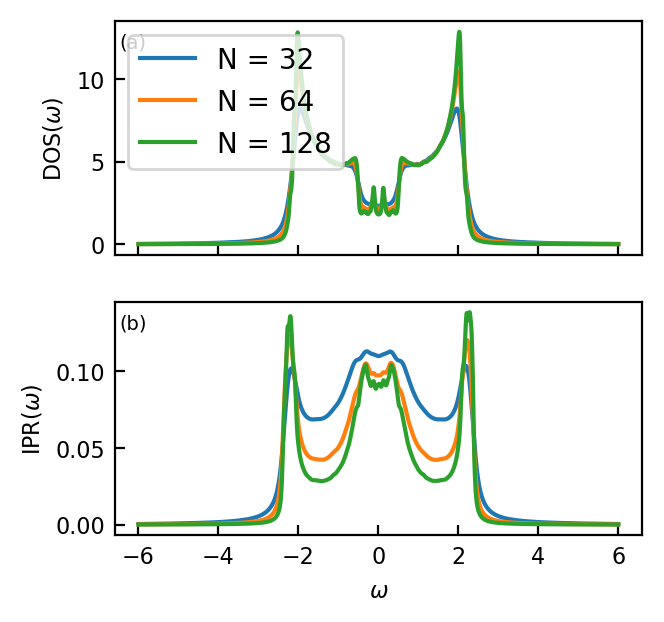

In [15]:
width = columnwidth
height =  columnwidth
dpi = 150

f, axes = plt.subplots(2,1, sharex = 'all', gridspec_kw = dict(hspace = 0.2))

i = -1
T_select = 60
T = o.Ts[T_select]
print(f'T = {T}')

for i, N in enumerate(o.Ns):
    if N < 32: continue
    
    axes[0].plot(o.E_bins[1:], o.sE[i][T_select, :], label = f'N = {N}')
    axes[1].plot(o.E_bins[1: ], o.sI[i][T_select, :])


axes[0].set(ylabel = 'DOS($\omega$)')
axes[1].set(ylabel = 'IPR($\omega$)', xlabel = '$\omega$')

axes[0].legend()

#inset_ax = inset_axes(axes[1], width="30%", height="50%", loc=1, borderpad = 0.2)
#inset_ax.set(xlim = (1,3), ylabel = 'IPR', xlabel = 'N', xticks = [], yticks = [])

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)"], axes):
    ax.text(0.01, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'black')

#f.subplots_adjust(bottom=0.2)
f.set_size_inches(width,height)
f.savefig('/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs/mobility_edge.eps', bbox_inches='tight')